In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

df = pd.read_csv("metrics.csv") 


print(df.shape)
print(df.columns)
df.sample(2)

(34, 19)
Index(['run_name', 'arc_features', 'arc_encoder_blocks', 'arc_num_params',
       'arc_latent_volume', 'arc_num_conv', 'arc_skip', 'train_loss',
       'valid_loss', 'test_loss', 'valid_F1', 'train_F1', 'test_F1',
       'train_Accuracy', 'valid_Accuracy', 'test_Accuracy',
       'train_Accuracy_seq', 'valid_Accuracy_seq', 'test_Accuracy_seq'],
      dtype='object')


,run_name,arc_features,arc_encoder_blocks,arc_num_params,arc_latent_volume,arc_num_conv,arc_skip,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
33,pseudop_nc_1_n4_0_n8_0_skip0,[4],0,65,512.0,1,0,0.169559,0.175586,0.175899,0.662685,0.737261,0.700356,0.682347,0.630577,0.656264,0.0,0.0,0.0
25,pseudop_nc_1_n4_0_n8_1_skip0,"[4, 8]",1,293,512.0,1,0,0.137333,0.171898,0.156034,0.688503,0.796744,0.739439,0.759915,0.658918,0.699155,0.0,0.0,0.0


In [2]:
sns.set_theme(style="whitegrid", palette="pastel")

In [3]:
df.sort_values(
    ["test_Accuracy","valid_Accuracy", "arc_features", "arc_num_params", "arc_latent_volume", "arc_skip"]
)
data_c_skips = df[df["arc_skip"] == 1]
data_c_no_skips = df[df["arc_skip"] == 0]

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar un subconjunto de variables importantes:
# Variables de arquitectura e hiperparámetros
cols_arq = [
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
    "arc_num_params",
    "arc_skip",
]
# Métricas de rendimiento
cols_perf = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]

# Como 'arc_skip' es categórica (0/1 o similar), la transformamos a numérica si es necesario
if df["arc_skip"].dtype == "object":
    df["arc_skip"] = df["arc_skip"].astype("category").cat.codes

# # Como 'arc_skip' es categórica (0/1 o similar), la transformamos a numérica si es necesario
# if df["arc_features"].dtype == "object":
#     df["arc_features"] = df["arc_features"].astype("category").cat.codes
# # Crear un DataFrame solo con las columnas de interés
df_subset = df[cols_arq +  cols_perf]

# Matriz de correlación completa
corr_matrix = df_subset.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

ValueError: could not convert string to float: '[4, 8, 16, 32, 64]'

In [6]:
# Filtrar modelos según skip connection
data_skip0 = df[df["arc_skip"] == 0]
data_skip1 = df[df["arc_skip"] == 1]

print("Modelos sin Skip Connections:", data_skip0.shape[0])
print("Modelos con Skip Connections:", data_skip1.shape[0])


cols_arq = [
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
    "arc_num_params"
]
# Métricas de rendimiento
cols_perf = ["train_Accuracy", "valid_Accuracy", "test_Accuracy"]

Modelos sin Skip Connections: 17
Modelos con Skip Connections: 17


In [ ]:
df["arc_features"] = df["arc_features"].astype("category").cat
# Crear un DataFrame solo con las columnas de interés
df_subset = data_skip0[cols_arq +  cols_perf]

# Matriz de correlación completa
corr_matrix = df_subset.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Sin Skip Connections")
plt.show()

ValueError: could not convert string to float: '[4, 4, 4, 4, 8]'

In [29]:
df["arc_features"] = df["arc_features"].astype("category").cat.codes
# Crear un DataFrame solo con las columnas de interés
df_subset = data_skip1[cols_arq +  cols_perf]

# Matriz de correlación completa
corr_matrix = df_subset.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Con Skip Connections")
plt.show()

ValueError: could not convert string to float: '[4, 4, 4, 4, 8]'

In [7]:
# Estadísticas para cada grupo
print("Estadísticas (sin skip connections):")
print(data_skip0[["train_Accuracy", "valid_Accuracy", "test_Accuracy"]].describe())

print("\nEstadísticas (con skip connections):")
print(data_skip1[["train_Accuracy", "valid_Accuracy", "test_Accuracy"]].describe())

Estadísticas (sin skip connections):
       train_Accuracy  valid_Accuracy  test_Accuracy
count       17.000000       17.000000      17.000000
mean         0.759710        0.666253       0.708180
std          0.057443        0.036248       0.050135
min          0.682347        0.610554       0.652342
25%          0.733567        0.646391       0.665815
50%          0.752223        0.665581       0.701540
75%          0.770064        0.675622       0.726403
max          0.943391        0.750553       0.847667

Estadísticas (con skip connections):
       train_Accuracy  valid_Accuracy  test_Accuracy
count       17.000000       17.000000      17.000000
mean         0.809942        0.706750       0.737824
std          0.060614        0.035932       0.047236
min          0.682347        0.630577       0.652342
25%          0.787518        0.691374       0.723476
50%          0.818408        0.709482       0.737661
75%          0.832279        0.726477       0.766946
max          0.957515   

In [8]:
data_skip0

,run_name,arc_features,arc_encoder_blocks,arc_num_params,arc_latent_volume,arc_num_conv,arc_skip,train_loss,valid_loss,test_loss,valid_F1,train_F1,test_F1,train_Accuracy,valid_Accuracy,test_Accuracy,train_Accuracy_seq,valid_Accuracy_seq,test_Accuracy_seq
0,pseudop_baseline_skip0,"[4, 8, 16, 32, 64]",4,37925,512.0,2,0,0.037428,0.146767,0.094325,0.761337,0.950362,0.866501,0.943391,0.750553,0.847667,0.0,0.0,0.0
3,pseudop_nc_2_n4_3_n8_1_skip0,"[4, 4, 4, 4, 8]",4,1349,64.0,2,0,0.111417,0.141640,0.127828,0.733566,0.836417,0.802643,0.807260,0.719466,0.769157,0.0,0.0,0.0
5,pseudop_nc_2_n4_2_n8_1_skip0,"[4, 4, 4, 8]",3,1109,128.0,2,0,0.125475,0.166314,0.135850,0.682603,0.801452,0.777750,0.770064,0.665017,0.742325,0.0,0.0,0.0
7,pseudop_nc_2_n4_1_n8_1_skip0,"[4, 4, 8]",2,869,256.0,2,0,0.120821,0.167547,0.154563,0.698948,0.820674,0.750911,0.788516,0.675622,0.701540,0.0,0.0,0.0
9,pseudop_nc_2_n4_0_n8_1_skip0,"[4, 8]",1,629,512.0,2,0,0.118822,0.156760,0.150625,0.729092,0.830046,0.771085,0.799140,0.708670,0.726403,0.0,0.0,0.0
11,pseudop_nc_2_n4_3_n8_0_skip0,"[4, 4, 4, 4]",3,845,64.0,2,0,0.142128,0.171519,0.167095,0.658456,0.776799,0.717684,0.733616,0.625057,0.660349,0.0,0.0,0.0
13,pseudop_nc_2_n4_2_n8_0_skip0,"[4, 4, 4]",2,605,128.0,2,0,0.133628,0.169431,0.165996,0.693663,0.797455,0.722758,0.761347,0.670608,0.678572,0.0,0.0,0.0
15,pseudop_nc_2_n4_1_n8_0_skip0,"[4, 4]",1,365,256.0,2,0,0.141296,0.165677,0.160083,0.696880,0.788949,0.737609,0.752223,0.672757,0.696670,0.0,0.0,0.0
17,pseudop_nc_2_n4_0_n8_0_skip0,[4],0,125,512.0,2,0,0.157223,0.170766,0.170921,0.673847,0.757239,0.688289,0.716411,0.660512,0.652342,0.0,0.0,0.0
19,pseudop_nc_1_n4_3_n8_1_skip0,"[4, 4, 4, 4, 8]",4,653,64.0,1,0,0.150788,0.166054,0.146705,0.698553,0.789803,0.796662,0.733567,0.646391,0.742921,0.0,0.0,0.0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
# Listas de campos
cols_arq = [
    "arc_num_params",
    "arc_features",
    "arc_num_conv",
    "arc_latent_volume",
] 
accuracy_field = "test_Accuracy"
fields = cols_arq  

def plot_accuracy_by_fields(df, fields, accuracy_field, ncols=3, title_suffix=""):
    """
    Genera boxplots de la accuracy en función de cada campo.

    Parámetros:
      - df: DataFrame sobre el que graficar.
      - fields: Lista de campos a analizar.
      - accuracy_field: Campo de rendimiento (ej. test_Accuracy).
      - ncols: Número de columnas en la grilla de subplots.
      - title_suffix: Sufijo para incluir en cada título (ej. "(Con Skip)").
    """
    nfields = len(fields)
    nrows = (nfields + ncols - 1) // ncols  # redondeo hacia arriba
    fig, axs = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5), sharey=True)
    axs = axs.flatten()
    axs[0].set_ylim(0.6,0.9)
    for i, field in enumerate(fields):
        # Trabajamos sobre una copia para evitar modificar el DataFrame original
        df_tmp = df.copy()

        # Si la variable es numérica y tiene muchos valores únicos, se crean 4 bins
        if (
            pd.api.types.is_numeric_dtype(df_tmp[field])
            and df_tmp[field].nunique() > 10
        ):
            try:
                df_tmp["bin"] = pd.qcut(df_tmp[field], q=4, duplicates="drop")
            except Exception:
                df_tmp["bin"] = df_tmp[field]
        else:
            df_tmp["bin"] = df_tmp[field]

        sns.boxplot(
            x="bin",
            y=accuracy_field,
            data=df_tmp,
            ax=axs[i],
            palette="Set2",
        )
        axs[i].set_title(f"{accuracy_field} vs {field} {title_suffix}")
        axs[i].set_xlabel(field)
        axs[i].set_ylabel(accuracy_field)
        axs[i].tick_params(axis="x", rotation=45)

    # Eliminar subplots vacíos
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()


# Filtrar el DataFrame según la presencia de skip connections
data_skip = df[df["arc_skip"] == 1]
data_no_skip = df[df["arc_skip"] == 0]

/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


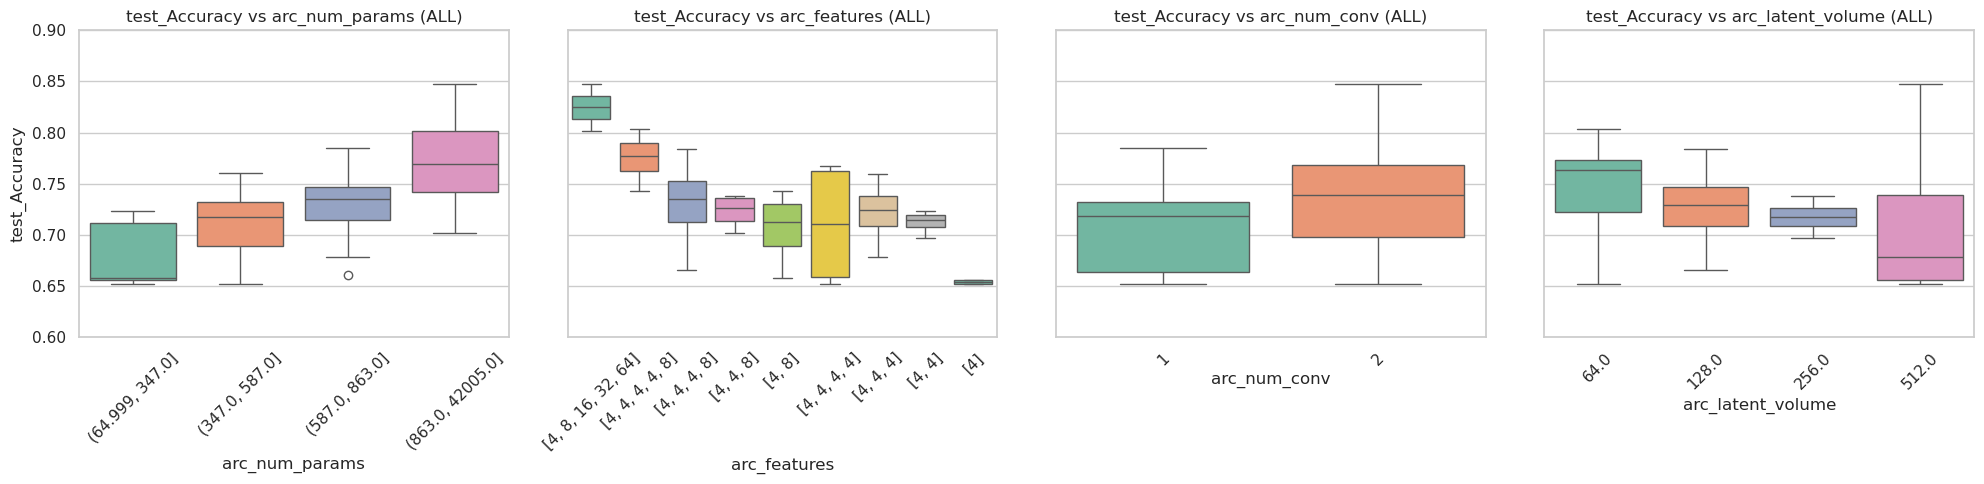

In [10]:
# Versión para modelos CON skip connections
plot_accuracy_by_fields(
    df, fields, accuracy_field, ncols=4, title_suffix="(ALL)"
)

/tmp/ipykernel_350018/2477951148.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/2477951148.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/2477951148.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/2477951148.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


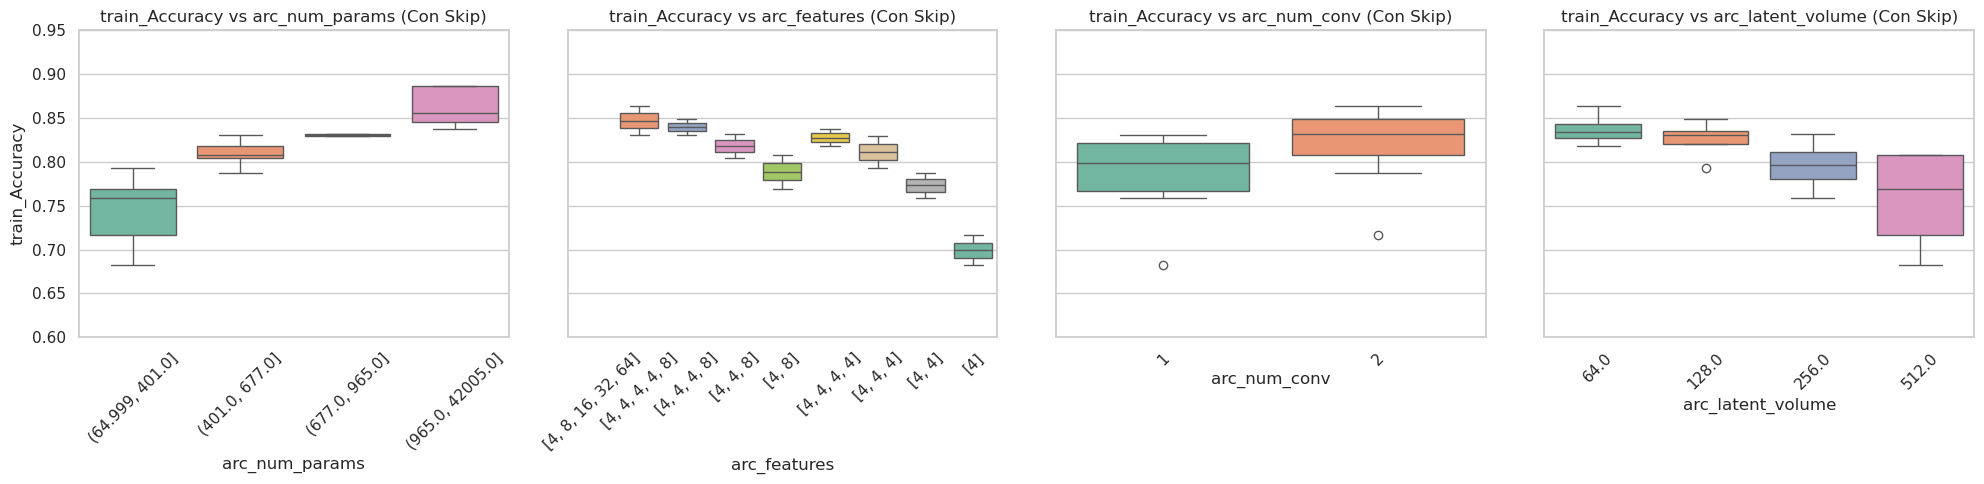

In [17]:
# Versión para modelos CON skip connections
plot_accuracy_by_fields(
    data_skip, fields, 'train_Accuracy', ncols=4, title_suffix="(Con Skip)"
)

/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


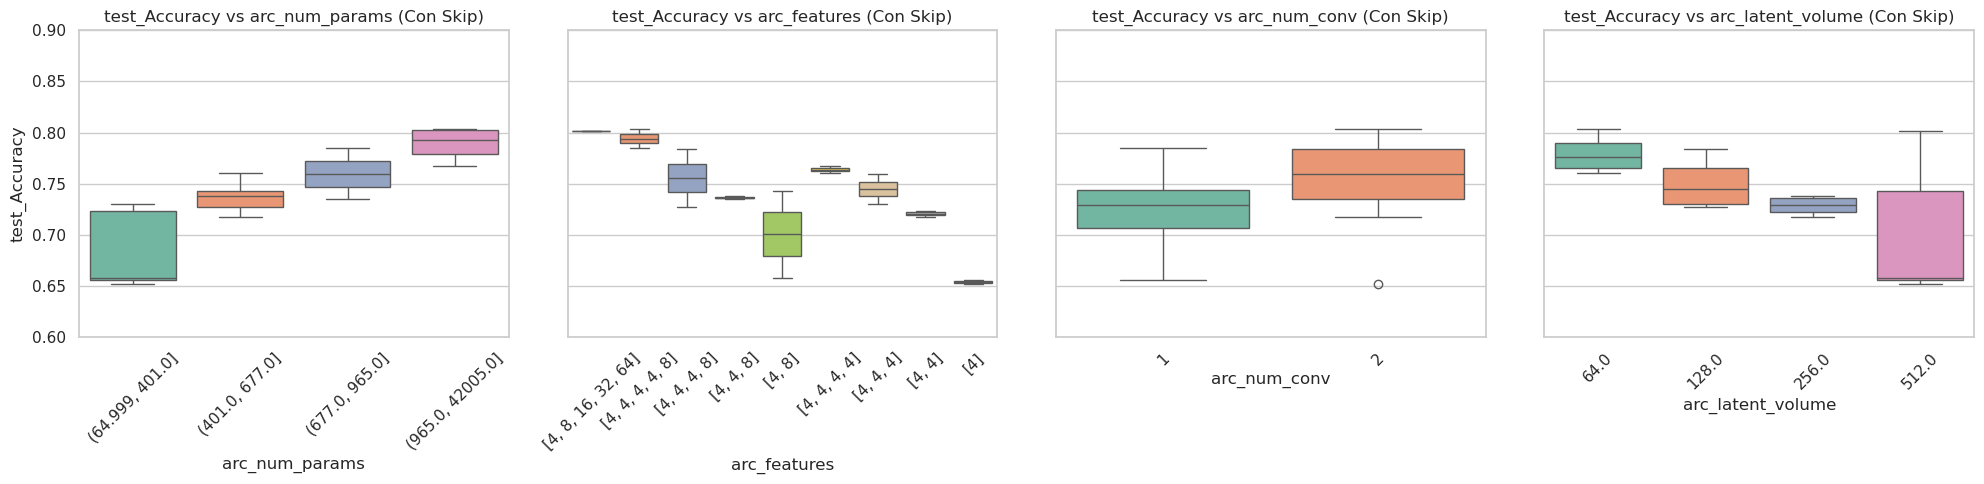

In [12]:
# Versión para modelos CON skip connections
plot_accuracy_by_fields(
    data_skip, fields, accuracy_field, ncols=4, title_suffix="(Con Skip)"
)

/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


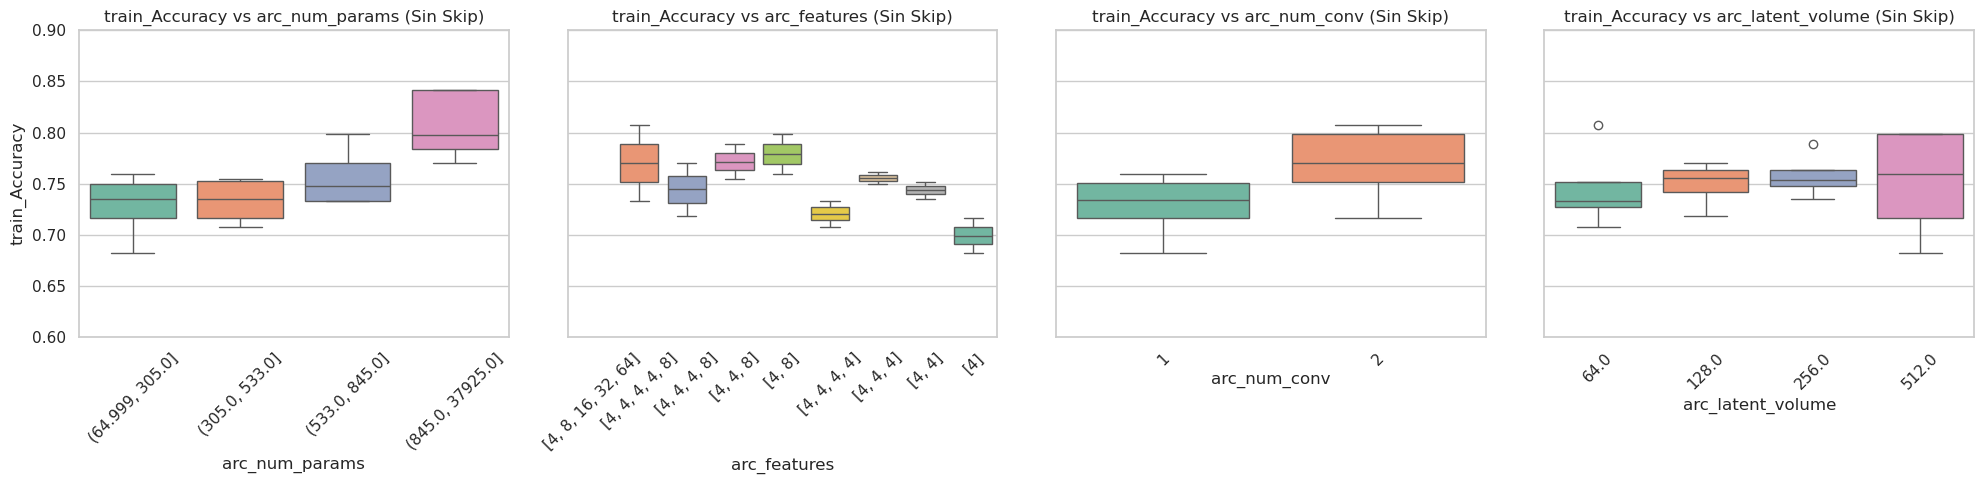

/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


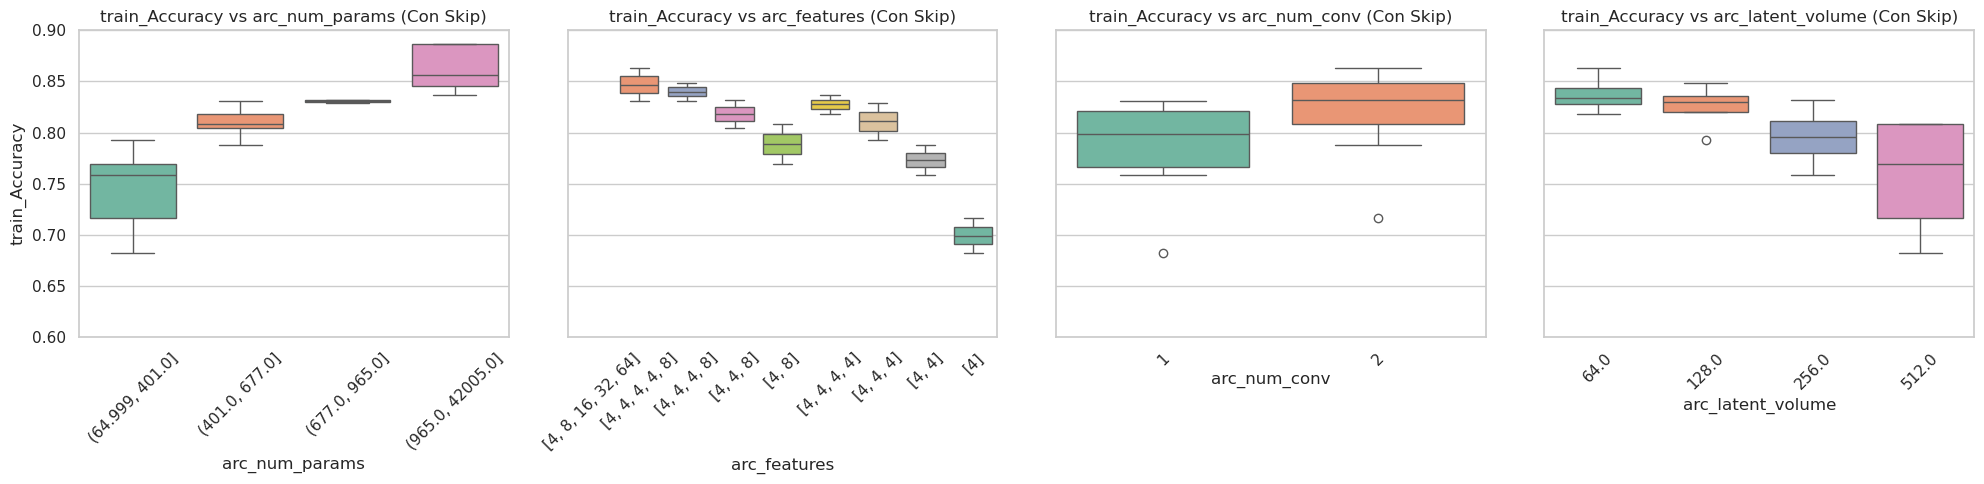

In [13]:
# Versión para modelos SIN skip connections
plot_accuracy_by_fields(
    data_no_skip, fields, 'train_Accuracy', ncols=4, title_suffix="(Sin Skip)"
)
# Versión para modelos SIN skip connections
plot_accuracy_by_fields(
    data_skip, fields, 'train_Accuracy', ncols=4, title_suffix="(Con Skip)"
)

/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


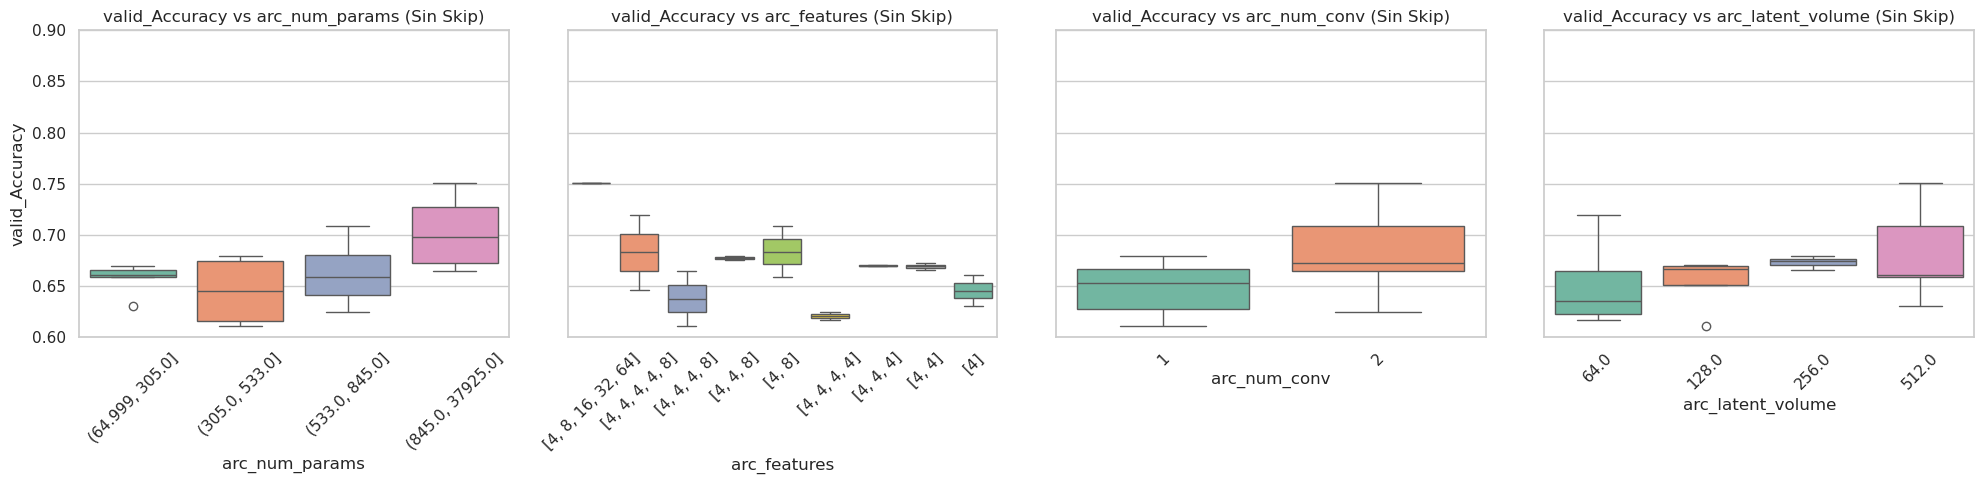

/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


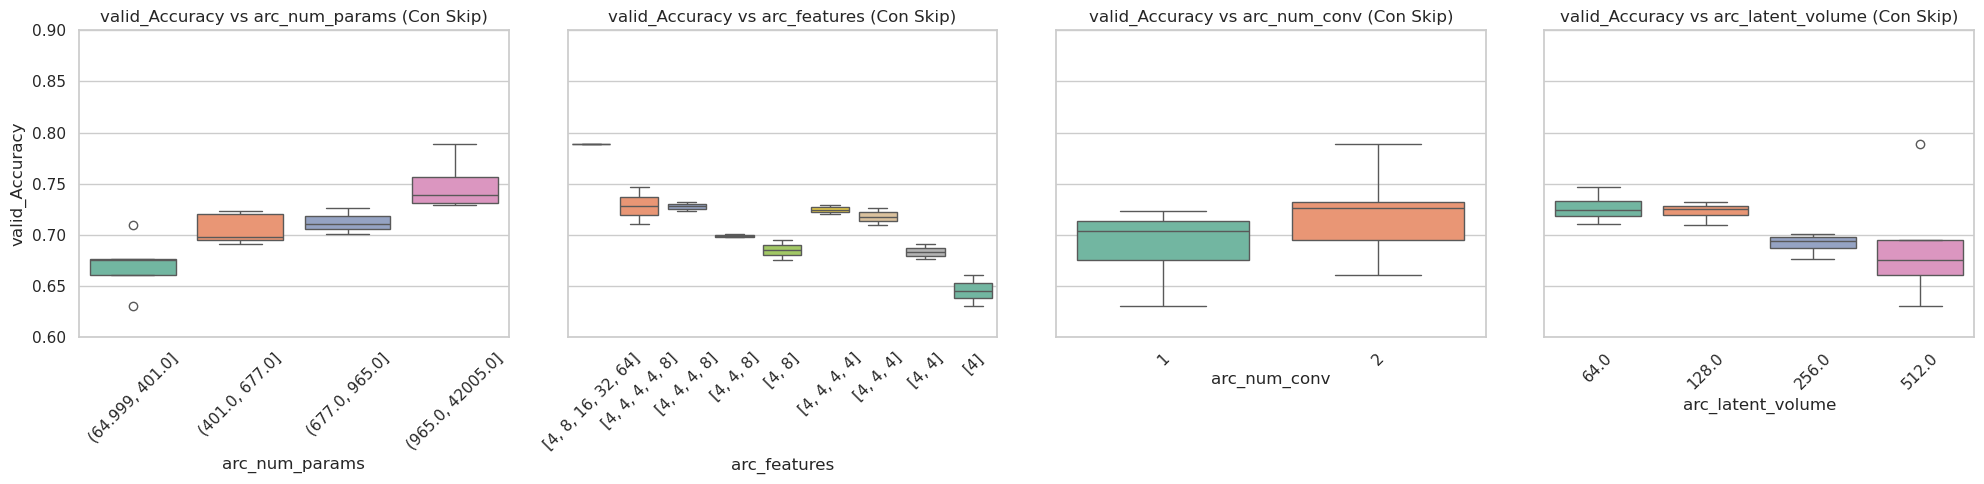

In [14]:
# Versión para modelos SIN skip connections
plot_accuracy_by_fields(
    data_no_skip, fields, 'valid_Accuracy', ncols=4, title_suffix="(Sin Skip)"
)
# Versión para modelos SIN skip connections
plot_accuracy_by_fields(
    data_skip, fields, 'valid_Accuracy', ncols=4, title_suffix="(Con Skip)"
)

/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


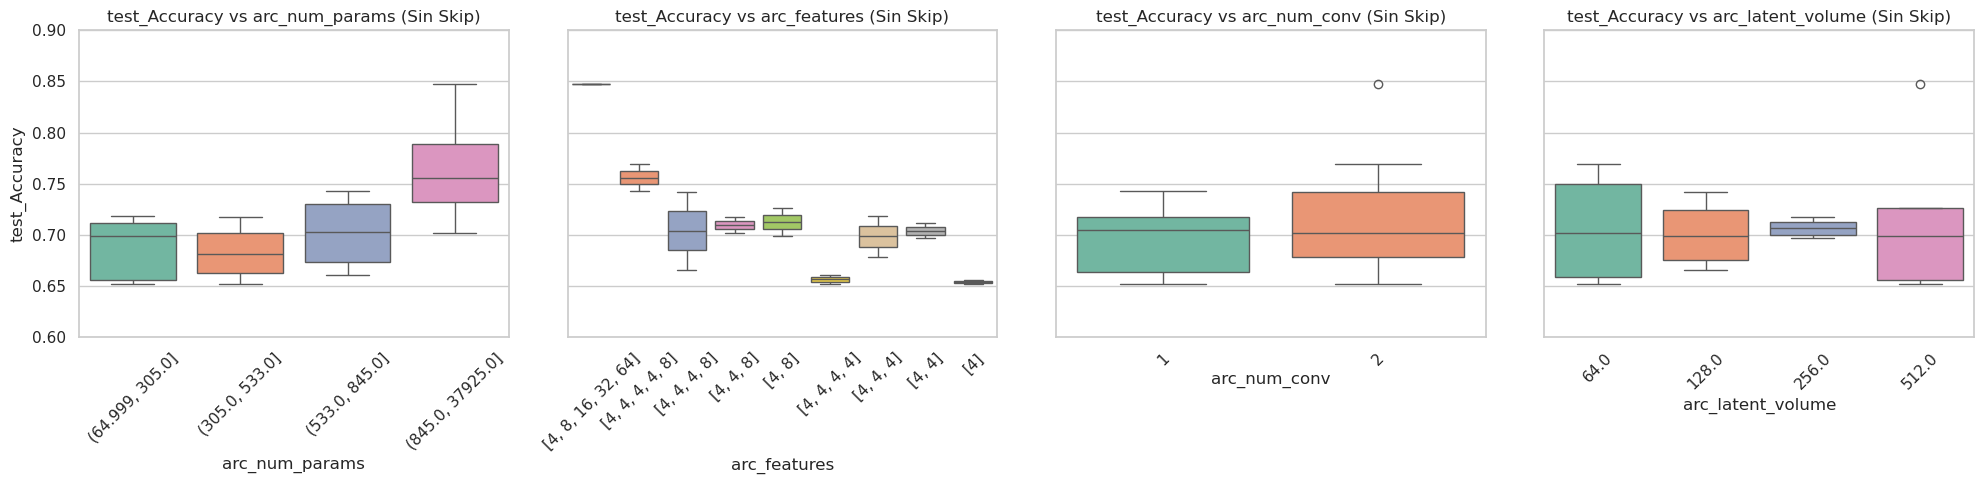

/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_350018/1864538733.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


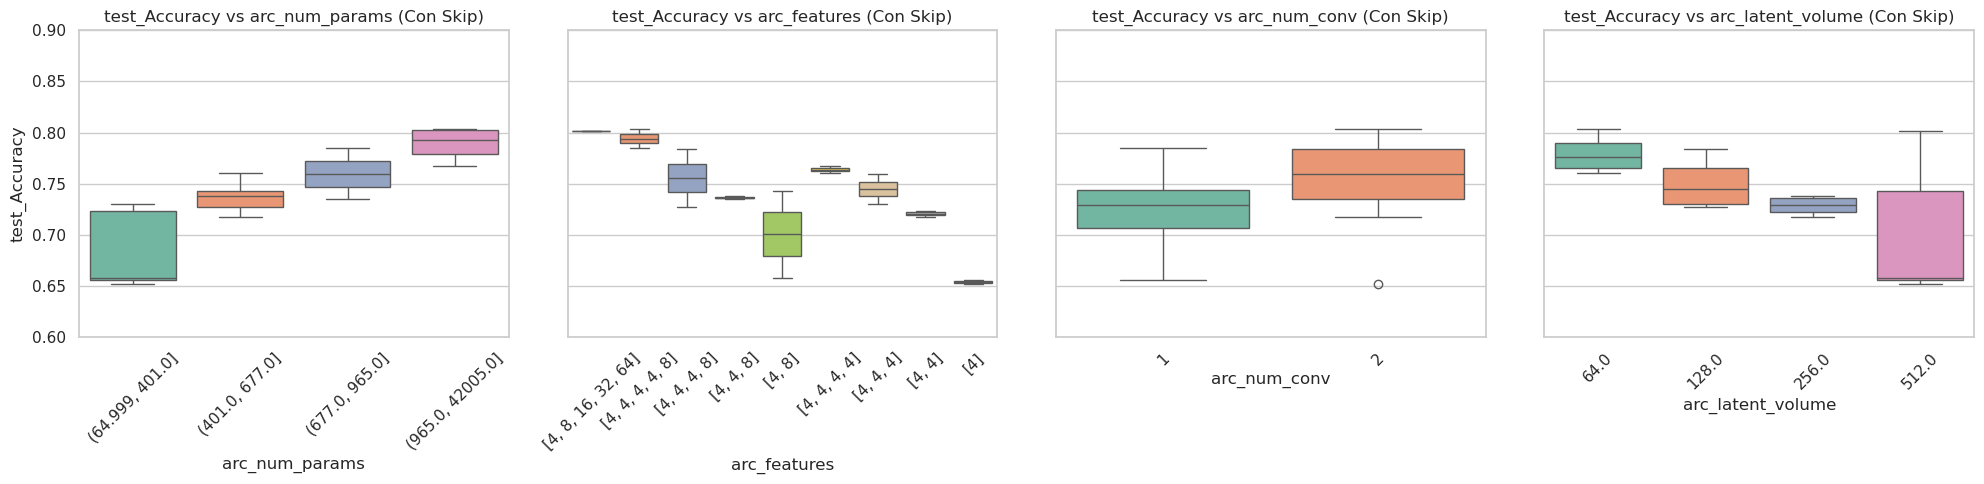

In [15]:
# Versión para modelos SIN skip connections
plot_accuracy_by_fields(
    data_no_skip, fields, 'test_Accuracy', ncols=4, title_suffix="(Sin Skip)"
)
# Versión para modelos SIN skip connections
plot_accuracy_by_fields(
    data_skip, fields, 'test_Accuracy', ncols=4, title_suffix="(Con Skip)"
)

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las medianas de vol_1 y vol_2
median_vol1 = df["vol_1"].mean()
median_vol2 = df["vol_2"].mean()


# Calcular la métrica compuesta normalizada
df["score_norm"] = df["test_Accuracy"] / (
    (df["vol_1"] / median_vol1) + (df["vol_2"] / median_vol2)
)

# Mostrar los primeros 20 modelos según esta métrica
N = 20
best_models_norm = df.nlargest(N, "score_norm")

print(
    f"Top {N} modelos según score_norm (test_Accuracy / (vol_1/mediana_vol1 + vol_2/mediana_vol2)):"
)
display(
    best_models_norm[
        [
            "name",
            "arc_skip",
            "arc_num_conv",
            "arc_num_params",
            "arc_features",
            "vol_1",
            "vol_2",
            "test_Accuracy",
            "score_norm",
        ]
    ].sort_values(by="score_norm", ascending=False)
)

# Visualización: Gráfico de barras de los mejores modelos según score_norm
plt.figure(figsize=(10, 6))
sns.barplot(
    x="name",
    y="score_norm",
    data=best_models_norm.sort_values(by="score_norm", ascending=False),
    palette="viridis",
)
plt.title(
    "Top modelos según score_norm\n(test_Accuracy / (vol_1/mediana_vol1 + vol_2/mediana_vol2))"
)
plt.xlabel("Nombre del Modelo")
plt.ylabel("Score_norm")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

KeyError: 'vol_1'

In [ ]:
# Calcular Z-scores para vol_1 y vol_2
df["z_vol1"] = (df["vol_1"] - df["vol_1"].mean()) / df["vol_1"].std()
df["z_vol2"] = (df["vol_2"] - df["vol_2"].mean()) / df["vol_2"].std()

# Calcular la métrica score_z
df["score_z"] = df["test_Accuracy"] / (
    df["z_vol1"].abs() + df["z_vol2"].abs() + 1
)
# Seleccionar los mejores modelos según score_z
best_models_z = df.nlargest(N, "score_z")
print("Top modelos según score_z:")
display(
    best_models_z[
        [
            "name",
            "arc_skip",
            "arc_num_conv",
            "arc_num_params",
            "arc_features",
            "vol_1",
            "vol_2",
            "test_Accuracy",
            "score_norm",
            "score_z",
        ]
    ]
)

Top modelos según score_z:


,name,arc_skip_conn,arc_num_conv1,arc_num_conv2,arc_filters,arc_rank,vol_1,vol_2,test_Accuracy,score_norm,score_z
107,num_convs-3-2-f8-r16-ld8,1,3,2,8,16,128.0,64.0,0.949943,0.458008,0.620449
82,num_convs-2-3-f4-r16-ld64,1,2,3,4,16,128.0,64.0,0.946239,0.456222,0.618029
104,num_convs-3-2-f8-r16-ld16,1,3,2,8,16,128.0,64.0,0.943831,0.455061,0.616457
105,num_convs-3-2-f8-r16-ld32,1,3,2,8,16,128.0,64.0,0.937348,0.451936,0.612223
106,num_convs-3-2-f8-r16-ld64,1,3,2,8,16,128.0,64.0,0.931733,0.449229,0.608555
81,num_convs-2-3-f4-r16-ld32,1,2,3,4,16,128.0,64.0,0.918710,0.442949,0.600049
69,num_convs-2-2-f4-r8-ld32,1,2,2,4,8,128.0,64.0,0.905577,0.436617,0.591471
68,num_convs-2-2-f4-r8-ld16,1,2,2,4,8,128.0,64.0,0.904322,0.436012,0.590652
80,num_convs-2-3-f4-r16-ld16,1,2,3,4,16,128.0,64.0,0.897116,0.432538,0.585945
83,num_convs-2-3-f4-r16-ld8,1,2,3,4,16,128.0,64.0,0.893605,0.430845,0.583652


In [14]:
df["score_mean"] = (df["score_norm"] + df["score_z"]) / 2
# Calcular Z-scores para vol_1 y vol_2
# Seleccionar los mejores modelos según score_z
best_models_z = df.nlargest(N, "score_mean")
print("Top modelos según score_mean:")
display(
    best_models_z[
        [
            "name",
            "arc_skip",
            "arc_num_conv",
            "arc_num_params",
            "arc_features",
            "vol_1",
            "vol_2",
            "test_Accuracy",
            "score_norm",
            "score_z",
            "score_mean",
        ]
    ]
)

KeyError: 'score_norm'